In [1]:
# Push, pull, and edit test: Alihan Ince

In [1]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Houses/Houses58-75/House64-1m.csv')
df.set_index('timestamp', inplace = True)
df.index= pd.to_datetime(df.index)
#df = df.resample('5T').mean()
df = df.loc['2019-04-01':'2019-04-08']
df
# df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
# df['Date'] = df['timestamp'].dt.date
# df["Date"] = df['Date'].astype(str)
# df = df.set_index('Date')
# df = df.loc['2019-04-01':'2019-04-08']
# df

,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
timestamp,,,,,,
2019-04-01 00:00:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01 00:01:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-01 00:02:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01 00:03:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01 00:04:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
...,...,...,...,...,...,...
2019-04-08 23:55:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-08 23:56:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-08 23:57:00+02:00,House64,0.0,0.24,0.0,0.24,0.24


In [9]:
# import_kw = df['IMPORT_KW']
# train_test_balance = len(df)//(8)
# train = list(import_kw)[train_test_balance:]
# test = list(import_kw)[:train_test_balance]

In [10]:
# import_kw = df['IMPORT_KW']
# train_test_balance = int(len(import_kw) * 0.832)
# train = list(import_kw)[:train_test_balance]
# test = list(import_kw)[train_test_balance:]

In [11]:
import_kw = df['IMPORT_KW']
len_test = 1540
train = list(import_kw)[len_test:]
test = list(import_kw)[:len_test]

In [12]:
print(len(train))
print(len(test))

9980
1540


Training

In [13]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(train)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((len(X_train), 100,1))

Model

In [15]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
309/309 [==============================] - 41s 121ms/step - loss: 0.0533 - mae: 0.1105
Epoch 2/5
309/309 [==============================] - 33s 107ms/step - loss: 0.0390 - mae: 0.0947
Epoch 3/5
309/309 [==============================] - 34s 112ms/step - loss: 0.0375 - mae: 0.0903
Epoch 4/5
309/309 [==============================] - 41s 132ms/step - loss: 0.0366 - mae: 0.0882
Epoch 5/5
309/309 [==============================] - 42s 136ms/step - loss: 0.0362 - mae: 0.0879


In [20]:
losses = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses)),losses)

KeyError: 'loss'

In [21]:
y_pred_model = model.predict(X_train)

In [22]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_model))
print(rmse_train)

0.19654854991045928


Test

In [23]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [24]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [25]:
y_test_pred_model = model.predict(X_test)

In [26]:
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred_model))
print(rmse_test)

0.22021290792253223


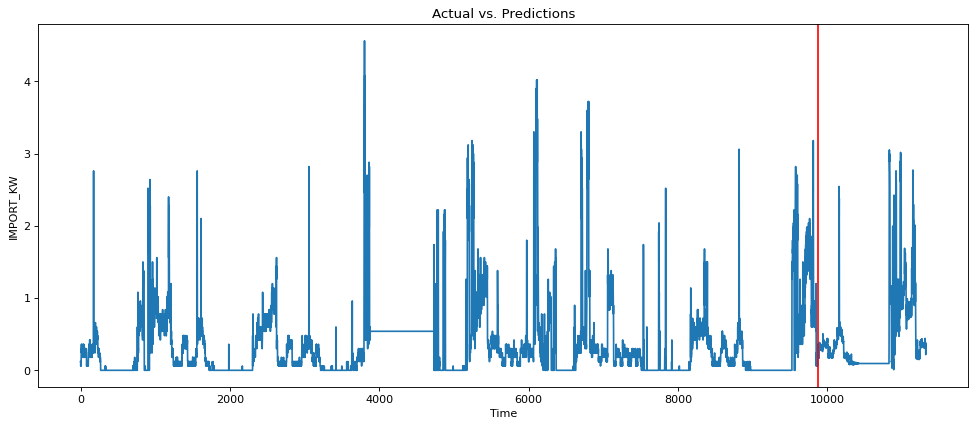

In [27]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    result = np.append(y_train, y_test_pred_model)
#     predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(result)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), result)
#     plt.plot(range(rows), y_test_pred_model)
    plt.axvline(x=len(y_train), color='r')
#     plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

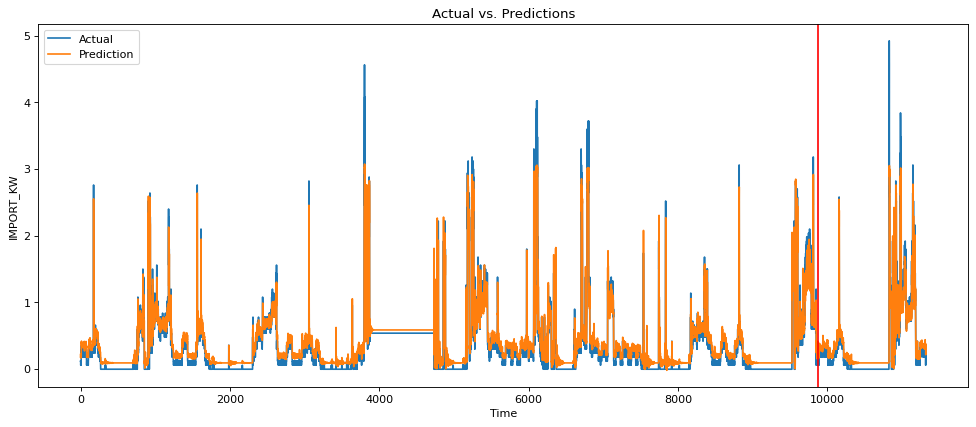

In [28]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

In [29]:
print(rmse_train)
print(rmse_test)

0.19654854991045928
0.22021290792253223


**Data to CSV**

In [30]:
train = import_kw[len_test:]
test = import_kw[:len_test]

In [31]:
data = y_test_pred_model
df_prediction = pd.DataFrame(data, columns = ['RNN_prediction_IMPORT_KW'])
df_prediction['timestamp'] = pd.date_range(start=test.index[0], periods=len(df_prediction), freq='5T')
df_prediction.set_index('timestamp', inplace = True)
df_prediction.index= pd.to_datetime(df_prediction.index)
df_prediction

,RNN_prediction_IMPORT_KW
timestamp,
2019-04-01 00:00:00+02:00,0.221434
2019-04-01 00:05:00+02:00,0.173385
2019-04-01 00:10:00+02:00,0.182678
2019-04-01 00:15:00+02:00,0.212764
2019-04-01 00:20:00+02:00,0.217799
...,...
2019-04-05 23:35:00+02:00,0.334358
2019-04-05 23:40:00+02:00,0.217728
2019-04-05 23:45:00+02:00,0.274159


<AxesSubplot:xlabel='timestamp'>

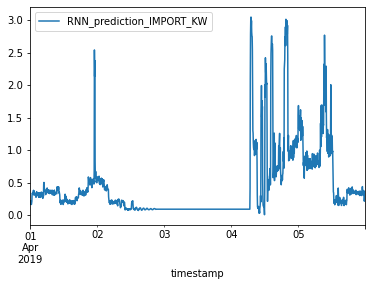

In [32]:
df_prediction.plot()

In [34]:
df_prediction.to_csv('IMPORT_KW_predictions.csv')

In [35]:
Import_prediction_24hours = pd.read_csv(r'IMPORT_KW_predictions.csv')
Import_prediction_24hours

,timestamp,RNN_prediction_IMPORT_KW
0,2019-04-01 00:00:00+02:00,0.221434
1,2019-04-01 00:05:00+02:00,0.173385
2,2019-04-01 00:10:00+02:00,0.182678
3,2019-04-01 00:15:00+02:00,0.212764
4,2019-04-01 00:20:00+02:00,0.217799
...,...,...
1435,2019-04-05 23:35:00+02:00,0.334358
1436,2019-04-05 23:40:00+02:00,0.217728
1437,2019-04-05 23:45:00+02:00,0.274159
1438,2019-04-05 23:50:00+02:00,0.373867
